In [1]:

import pandas as pd
import pyarrow as pa
import os
import zipfile
import matplotlib.pyplot as plt 
from collections import Counter
import numpy as np
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.float_format = '{:.2f}'.format

In [2]:
#pip freeze > requirements.txt
#aaaagggg
os.getcwd()
os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')

In [3]:
file = pd.read_csv(os.getcwd()+ '\Complete_SEDS.csv')
file1=file
codes = pd.read_csv(os.getcwd()+ '/residential_sector_codes.csv')
codes.head(1)

,CLHCK
0,CLRCB


In [4]:
file1['Year'] = pd.to_datetime(file1['Year'], format='%Y')
file1=file1[~(file1['StateCode']=='US')]

In [5]:
file1

,Data_Status,MSN,StateCode,Year,Data
0,2021F,ABICB,AK,1960-01-01,0.00
1,2021F,ABICB,AK,1961-01-01,0.00
2,2021F,ABICB,AK,1962-01-01,0.00
3,2021F,ABICB,AK,1963-01-01,0.00
4,2021F,ABICB,AK,1964-01-01,0.00
...,...,...,...,...,...
2007506,2021F,ZWHDP,WY,2017-01-01,7903.00
2007507,2021F,ZWHDP,WY,2018-01-01,8180.00
2007508,2021F,ZWHDP,WY,2019-01-01,8915.00
2007509,2021F,ZWHDP,WY,2020-01-01,8079.00


In [6]:
## take each unique variable in the file
	#Iterate over it and join them in 1 big dataframe
 

In [7]:
pqr = codes['CLHCK'].unique() #Taking the unique list of codes
abc = len(pqr) #The length of codes
new_list_of_titles = []
dfs = []
for i in pqr:
	if i not in new_list_of_titles:
		new_list_of_titles.append(i)
print(new_list_of_titles)




['CLRCB', 'CLRCD', 'CLRCP', 'CLRCV', 'DFRCB', 'DFRCD', 'DFRCP', 'DFRCV', 'ESRCB', 'ESRCD', 'ESRCP', 'ESRCV', 'ESRPP', 'GERCB', 'HLRCB', 'HLRCD', 'HLRCP', 'HLRCV', 'KSRCB', 'KSRCD', 'KSRCP', 'KSRCV', 'LORCB', 'NGRCB', 'NGRCD', 'NGRCP', 'NGRCV', 'PARCB', 'PARCD', 'PARCK', 'PARCP', 'PARCV', 'PERCD', 'PERCV', 'PERSB', 'PQRCB', 'PQRCD', 'PQRCP', 'PQRCV', 'SFRCB', 'SOR7P', 'SORCB', 'SOTCB', 'SOTGP', 'SOTXB', 'TERCB', 'TERCD', 'TERCV', 'TERPB', 'TNRCB', 'TNRSB', 'WDRCB', 'WDRCD', 'WDRCV', 'WDRSB', 'WDRXB']


In [8]:
general_consumption= file1[file1['MSN'].str.contains('ESRCV')]

In [9]:
# Convert new_list_of_titles to a single regex pattern
pattern1 = '|'.join(new_list_of_titles)

# Use str.contains() with the regex pattern
filtered_df11 = file1[file1['MSN'].str.contains(pattern1)]

In [10]:
merged_data = pd.merge(general_consumption, filtered_df11, on=["StateCode", "Year", "Data_Status"], how="left")


In [11]:

merged_data

,Data_Status,MSN_x,StateCode,Year,Data_x,MSN_y,Data_y
0,2021F,ESRCV,AK,1970-01-01,16.70,CLRCB,233.00
1,2021F,ESRCV,AK,1970-01-01,16.70,CLRCD,2.47
2,2021F,ESRCV,AK,1970-01-01,16.70,CLRCP,13.00
3,2021F,ESRCV,AK,1970-01-01,16.70,CLRCV,0.60
4,2021F,ESRCV,AK,1970-01-01,16.70,DFRCB,7932.00
...,...,...,...,...,...,...,...
136216,2021F,ESRCV,WY,2021-01-01,323.70,WDRCB,3769.00
136217,2021F,ESRCV,WY,2021-01-01,323.70,WDRCD,11.37
136218,2021F,ESRCV,WY,2021-01-01,323.70,WDRCV,18.00
136219,2021F,ESRCV,WY,2021-01-01,323.70,WDRSB,1587.00


In [12]:
import pandas as pd
pivoted_data = merged_data.pivot_table(index=["StateCode", "Year", "Data_Status","MSN_x","Data_x"], columns="MSN_y", values="Data_y", aggfunc="first")
# Reset index to flatten the dataframe
pivoted_data.reset_index(inplace=True)


In [13]:
pivoted_data

MSN_y,StateCode,Year,Data_Status,MSN_x,Data_x,CLRCB,CLRCD,CLRCP,CLRCV,DFRCB,...,TERCD,TERCV,TERPB,TNRCB,TNRSB,WDRCB,WDRCD,WDRCV,WDRSB,WDRXB
0,AK,1970-01-01,2021F,ESRCV,16.70,233.00,2.47,13.00,0.60,7932.00,...,2.30,38.90,81.80,17800.00,16912.00,1290.00,0.82,0.30,403.00,887.00
1,AK,1971-01-01,2021F,ESRCV,20.10,177.00,2.40,10.00,0.40,10433.00,...,2.34,47.70,93.80,21282.00,20418.00,1256.00,0.86,0.30,392.00,864.00
2,AK,1972-01-01,2021F,ESRCV,22.00,199.00,2.28,11.00,0.50,8220.00,...,2.49,49.00,90.80,20497.00,19681.00,1187.00,0.87,0.30,370.00,816.00
3,AK,1973-01-01,2021F,ESRCV,22.30,92.00,2.44,5.00,0.20,10014.00,...,2.73,49.80,86.20,19008.00,18263.00,1084.00,1.00,0.30,338.00,745.00
4,AK,1974-01-01,2021F,ESRCV,25.30,92.00,2.54,5.00,0.20,10041.00,...,3.44,61.50,85.40,18605.00,17871.00,1066.00,1.54,0.50,333.00,734.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,WY,2017-01-01,2021F,ESRCV,315.30,0.00,0.00,0.00,0.00,117.00,...,18.88,531.60,88.30,30680.00,28154.00,4193.00,10.76,19.00,1765.00,2427.00
2648,WY,2018-01-01,2021F,ESRCV,310.20,0.00,0.00,0.00,0.00,114.00,...,18.48,526.60,88.90,31051.00,28500.00,4214.00,11.90,21.10,1774.00,2440.00
2649,WY,2019-01-01,2021F,ESRCV,318.40,0.00,0.00,0.00,0.00,107.00,...,17.48,528.60,93.00,32842.00,30241.00,4266.00,11.46,20.60,1796.00,2470.00
2650,WY,2020-01-01,2021F,ESRCV,319.90,0.00,0.00,0.00,0.00,72.00,...,17.76,506.20,90.60,30951.00,28498.00,3957.00,9.47,15.80,1666.00,2291.00


In [14]:
pivoted_data[pivoted_data['StateCode']=='AK']

MSN_y,StateCode,Year,Data_Status,MSN_x,Data_x,CLRCB,CLRCD,CLRCP,CLRCV,DFRCB,...,TERCD,TERCV,TERPB,TNRCB,TNRSB,WDRCB,WDRCD,WDRCV,WDRSB,WDRXB
0,AK,1970-01-01,2021F,ESRCV,16.70,233.00,2.47,13.00,0.60,7932.00,...,2.30,38.90,81.80,17800.00,16912.00,1290.00,0.82,0.30,403.00,887.00
1,AK,1971-01-01,2021F,ESRCV,20.10,177.00,2.40,10.00,0.40,10433.00,...,2.34,47.70,93.80,21282.00,20418.00,1256.00,0.86,0.30,392.00,864.00
2,AK,1972-01-01,2021F,ESRCV,22.00,199.00,2.28,11.00,0.50,8220.00,...,2.49,49.00,90.80,20497.00,19681.00,1187.00,0.87,0.30,370.00,816.00
3,AK,1973-01-01,2021F,ESRCV,22.30,92.00,2.44,5.00,0.20,10014.00,...,2.73,49.80,86.20,19008.00,18263.00,1084.00,1.00,0.30,338.00,745.00
4,AK,1974-01-01,2021F,ESRCV,25.30,92.00,2.54,5.00,0.20,10041.00,...,3.44,61.50,85.40,18605.00,17871.00,1066.00,1.54,0.50,333.00,734.00
5,AK,1975-01-01,2021F,ESRCV,31.10,88.00,2.87,5.00,0.30,9441.00,...,3.23,78.10,96.10,25137.00,24166.00,1410.00,1.62,0.70,440.00,970.00
6,AK,1976-01-01,2021F,ESRCV,36.60,71.00,2.78,4.00,0.20,11656.00,...,3.49,94.00,100.30,28019.00,26954.00,1548.00,1.74,0.80,483.00,1065.00
7,AK,1977-01-01,2021F,ESRCV,44.80,69.00,2.86,4.00,0.20,13126.00,...,3.81,111.20,107.70,30394.00,29152.00,1806.00,1.96,1.10,564.00,1242.00
8,AK,1978-01-01,2021F,ESRCV,49.70,0.00,0.00,0.00,0.00,15450.00,...,4.14,134.70,116.20,33880.00,32520.00,1978.00,2.08,1.30,617.00,1361.00
9,AK,1979-01-01,2021F,ESRCV,49.20,0.00,0.00,0.00,0.00,5488.00,...,5.34,116.70,95.50,23717.00,21836.00,2735.00,2.98,2.50,854.00,1881.00


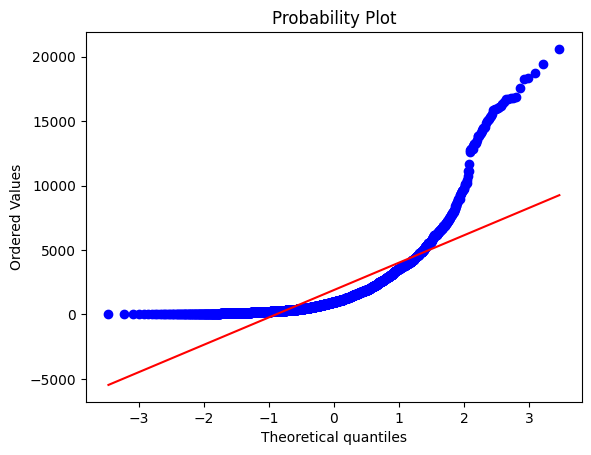

In [15]:
import numpy as np
import statsmodels.api as sm
import pylab
import scipy.stats as stats

stats.probplot(pivoted_data['Data_x'], plot=pylab)
pylab.show()

In [16]:
needed_columns=(pivoted_data.columns[5:])

In [17]:
needed_columns1 =pivoted_data.iloc[:,4: ]

In [18]:
needed_columns1.iloc[:,:1]

MSN_y,Data_x
0,16.70
1,20.10
2,22.00
3,22.30
4,25.30
...,...
2647,315.30
2648,310.20
2649,318.40
2650,319.90


In [ ]:
fig = plt.figure()

for i in range(1, 55):
    ax = fig.add_subplot(11,5 ,i)
    stats.probplot(needed_columns1.iloc[:,:i], plot=pylab)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

In [ ]:
for i in range(1, 55): # So make the range of the plots you need
    for j in needed_columns:
        stats.probplot(pivoted_data[j], plot=pylab)
        plt.subplot(5, 11, i) # This is the size
        plt.text(0.5, 0.5, str((2, 3, i)),
				fontsize=18, ha='center')

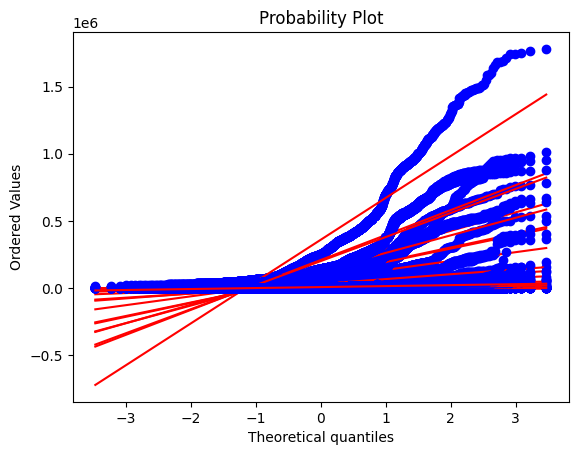

In [67]:

    
for i in needed_columns:
    stats.probplot(pivoted_data[i], plot=pylab)


In [ ]:
    
for i,j in enumerate(needed_columns):
    while 0 < i < 55:
        plt.subplot(5, 11, i)
        plt.text(0.5, 0.5, str((2, 3, i)),
        fontsize=18, ha='center')

In [ ]:
fig = plt.figure()

for i,j in enumerate(needed_columns):
    if 0 < i < len(needed_columns)
    ax = fig.add_subplot(11,5 ,i)
    stats.probplot(needed_columns1.iloc[:,:i], plot=pylab)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

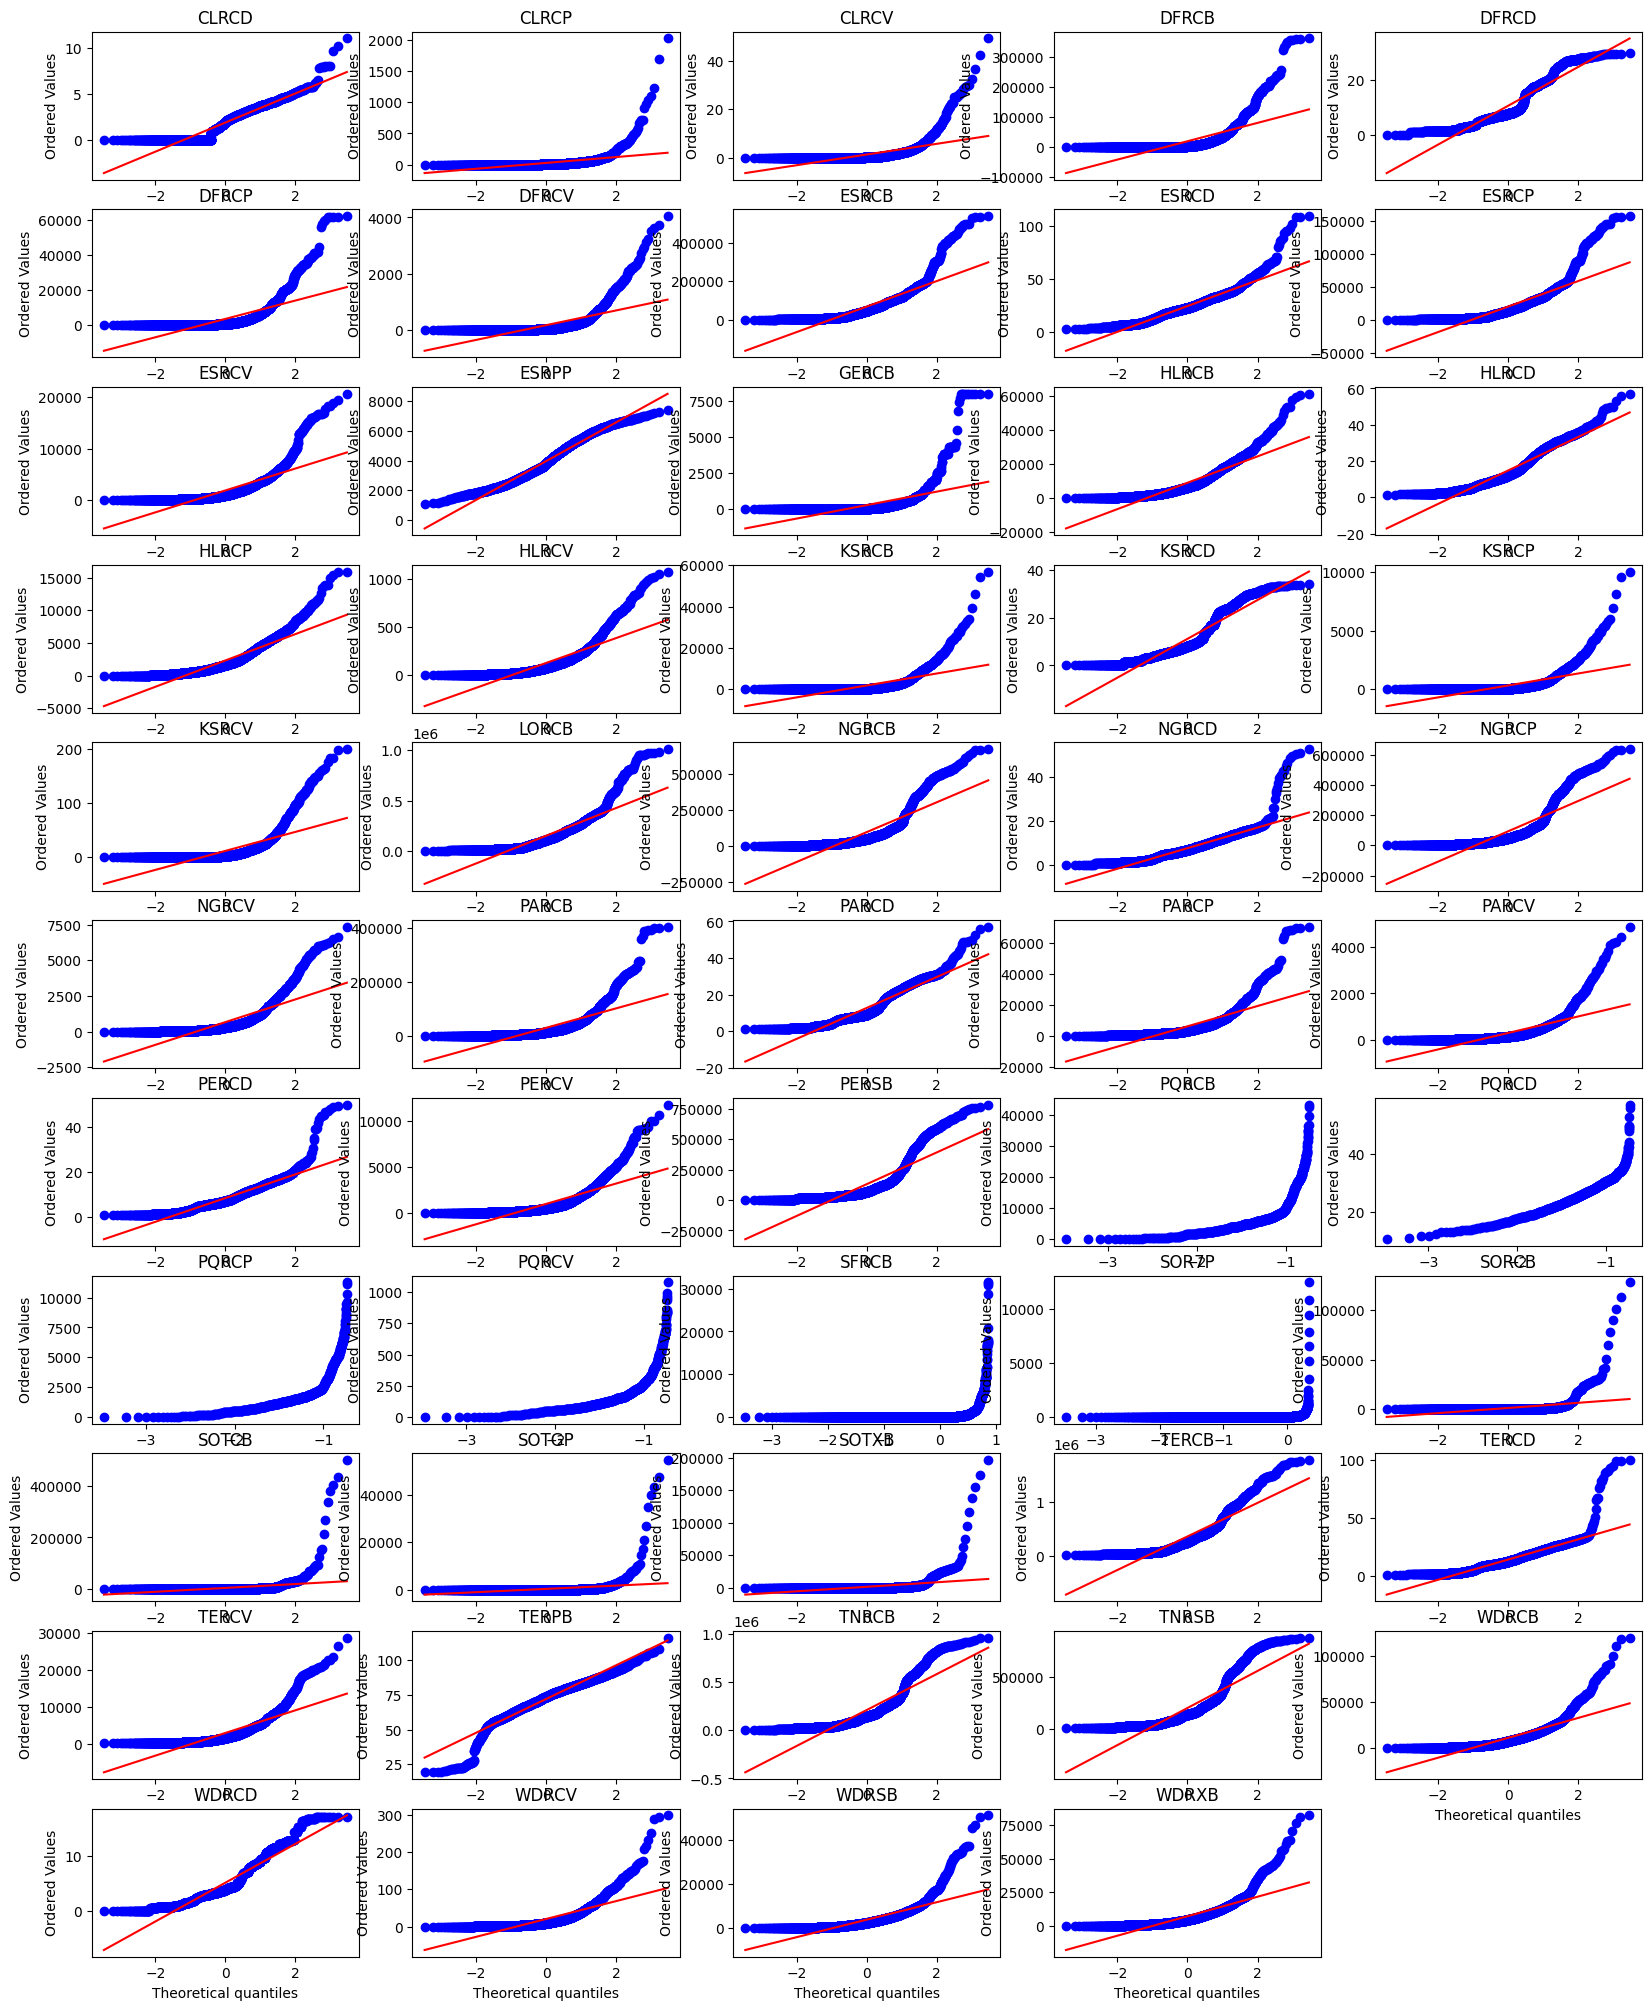

In [33]:
#This one works for plotting many plots. :) 

fig = plt.figure(figsize=(20,25))
for i,j in enumerate(needed_columns):
    if 0 < i < len(needed_columns):
        ax = fig.add_subplot(11,5 ,i)
        stats.probplot(needed_columns1[j], plot=pylab)
        ax.set_title(j)